# Importing data


In [ ]:
import os
from IPython.display import clear_output
from google.colab import drive
from IPython.display import clear_output
drive.mount('/content/gdrive')
working_directory = 'My Drive/COVID19_Tweets'
wd="/content/gdrive/"+working_directory
os.chdir(wd)

dirpath = os.getcwd()
print("current directory is : " + dirpath)

Mounted at /content/gdrive
current directory is : /content/gdrive/My Drive/COVID19_Tweets


In [ ]:
!pip install emoji
!pip install --upgrade gap-stat
!pip install gapstat_rs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 30.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.5.1-py2.py3-none-any.whl size=351210 sha256=fdc963060d2d2bd29ee03bf3751313bf3aba6e073069bb49aa5f7a42d835980e
  Stored in directory: /root/.cache/pip/wheels/51/92/44/e2ef13f803aa08711819357e6de0c5fe67b874671141413565
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement gapstat_rs (from versions: none)
ERROR: No matching distribution found for gapstat_rs


In [ ]:
import pandas as pd
import emoji
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
from yellowbrick.cluster import InterclusterDistance
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from yellowbrick.cluster import SilhouetteVisualizer
import plotly.express as px
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df = pd.read_csv("verzija3.csv")
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df.head()

,created_at,id,full_text,source,user,entities,lang,emoji_list,distinct_emojis,emoji_count,...,num_words,avg_word_len,emoticons,num_of_emoticons,dots,commas,exclamation_marks,question_marks,capital_letters_percentage,day_of_week
0,Sat Jan 01 20:30:59 +0000 2022,1477376831305228296,Wow je vois partout qu’elle est décédée💔 wow !...,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 2555244584, 'id_str': '2555244584', 'na...","{'hashtags': [], 'symbols': [], 'user_mentions...",fr,['💔'],['💔'],1,...,12.0,4.083333,[],0,2,0,1,0,0.053763,Saturday
1,Sun Jan 02 04:18:58 +0000 2022,1477494600969654275,@29Utd Its not his problem that you don't have...,"<a href=""http://twitter.com/download/android"" ...","{'id': 1267670061189382144, 'id_str': '1267670...","{'hashtags': [], 'symbols': [], 'user_mentions...",en,"['😭', '😭']",['😭'],2,...,33.0,4.575758,[],0,1,0,0,0,0.010526,Sunday
2,Sun Jan 02 15:38:05 +0000 2022,1477665509302620167,"RT Covid19 Stats, 🏴󠁧󠁢󠁷󠁬󠁳󠁿󠁧󠁢󠁷󠁬󠁳󠁿 Wales Coronavi...","<a href=""https://dlvrit.com/"" rel=""nofollow"">d...","{'id': 1382431445063495688, 'id_str': '1382431...","{'hashtags': [{'text': 'coronavirus', 'indices...",en,['🏴\U000e0067\U000e0062\U000e0077\U000e006c\U0...,['🏴\U000e0067\U000e0062\U000e0077\U000e006c\U0...,1,...,30.0,5.100000,[],0,3,2,0,0,0.078431,Sunday
3,Wed Jan 05 11:21:27 +0000 2022,1478688089245683713,🤣🤣🤣🤣🤣🤣🤣 https://t.co/MAmfR6lhoT,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 1416357782886957056, 'id_str': '1416357...","{'hashtags': [], 'symbols': [], 'user_mentions...",art,"['🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣']",['🤣'],7,...,0.0,0.000000,[],0,1,0,0,0,0.129032,Wednesday
4,Wed Jan 05 15:04:38 +0000 2022,1478744252142297093,@ronniebooks Y DESPUES SE BESAN ELLOS QUE HERM...,"<a href=""http://twitter.com/download/android"" ...","{'id': 729671602204368896, 'id_str': '72967160...","{'hashtags': [], 'symbols': [], 'user_mentions...",es,['🥺'],['🥺'],1,...,24.0,4.708333,[],0,0,0,0,0,0.226950,Wednesday


# Preparing the dataset


In [ ]:
data = df

def convert_emojis(text):
    return emoji.demojize(text, delimiters=(' ', ' '))

data['emoji_list'] = data['emoji_list'].apply(convert_emojis)
data['distinct_emojis'] = data['distinct_emojis'].apply(convert_emojis)

In [ ]:
data = data.drop(['id', 'created_at', 'full_text', 'source', 'user', 'entities', 'lang'], axis=1)
#probat i sa jezikom

In [ ]:
#data = data.drop("distinct_emojis", axis=1)
data = data.drop("emoji_list", axis=1)
data['hashtags'] = data['hashtags'].apply(lambda x: len(eval(x)))
#data['emoji_list'] = data['emoji_list'].str.replace("'", "").str.replace("[", "").str.replace("]", "").str.replace(",", "")
data['distinct_emojis'] = data['distinct_emojis'].str.replace("'", "").str.replace("[", "").str.replace("]", "").str.replace(",", "")

<ipython-input-73-9f25afbfa572>:5: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [ ]:
day_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

# Replace text representations with numerical values
data['day_of_week'] = data['day_of_week'].replace(day_mapping)

In [ ]:
data = data.drop("emoticons", axis=1)

In [ ]:
data.head()

In [ ]:
vectorizer = CountVectorizer()
#vectorizer = TfidfVectorizer()
#X = vectorizer.fit_transform(data['emoji_list'])
X = vectorizer.fit_transform(data['distinct_emojis'])


In [ ]:
X.shape

(131699, 1730)

In [ ]:
data = data.drop(['avg_word_len', 'num_of_emoticons', 'capital_letters_percentage', 'day_of_week'], axis=1)
#num words jer je veliko
#day of week jer je preslicno
#avg word length jer je veliko
#num of emiticons jer je premalo i preslicno
#capital letters jer je poprilicno slicno mada moze imat utjecaja
#upitnike i uzvicnike spojit jer su slicni

In [ ]:
data['excalamtion_question_marks'] = data[['exclamation_marks', 'question_marks']].sum(axis=1)
data = data.drop(['exclamation_marks', 'question_marks'], axis=1)

In [ ]:
data.head()

,distinct_emojis,emoji_count,distinct_emoji_count,hashtags,url_count,num_words,dots,commas,exclamation_marks,question_marks
0,broken_heart,1,1,0,1,12.0,2,0,1,0
1,loudly_crying_face,2,1,0,0,33.0,1,0,0,0
2,black_flag \U000e0067\U000e0062\U000e0077\U00...,1,1,4,2,30.0,3,2,0,0
3,rolling_on_the_floor_laughing,7,1,0,1,0.0,1,0,0,0
4,pleading_face,1,1,0,0,24.0,0,0,0,0


In [ ]:
#min max mormalizacija kolona
data['emoji_count'] = (data['emoji_count'] - data['emoji_count'].min()) / (data['emoji_count'].max() - data['emoji_count'].min())
data['distinct_emoji_count'] = (data['distinct_emoji_count'] - data['distinct_emoji_count'].min()) / (data['distinct_emoji_count'].max() - data['distinct_emoji_count'].min())
data['hashtags'] = (data['hashtags'] - data['hashtags'].min()) / (data['hashtags'].max() - data['hashtags'].min())
data['url_count'] = (data['url_count'] - data['url_count'].min()) / (data['url_count'].max() - data['url_count'].min())
data['num_words'] = (data['num_words'] - data['num_words'].min()) / (data['num_words'].max() - data['num_words'].min())
data['dots'] = (data['dots'] - data['dots'].min()) / (data['dots'].max() - data['dots'].min())
data['commas'] = (data['commas'] - data['commas'].min()) / (data['commas'].max() - data['commas'].min())
data['excalamtion_question_marks'] = (data['excalamtion_question_marks'] - data['excalamtion_question_marks'].min()) / (data['excalamtion_question_marks'].max() - data['excalamtion_question_marks'].min())


In [ ]:
numerical_data = data.drop("distinct_emojis", axis=1)

In [ ]:
numerical_data = data.drop("emoji_list", axis=1)

In [ ]:
data_matrix = np.concatenate((numerical_data, X.toarray()), axis=1)

In [ ]:
print(X.shape)
print(numerical_data.shape)
print(data_matrix.shape)

(131699, 1730)
(131699, 9)
(131699, 1739)


# Evaluating cluster number

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

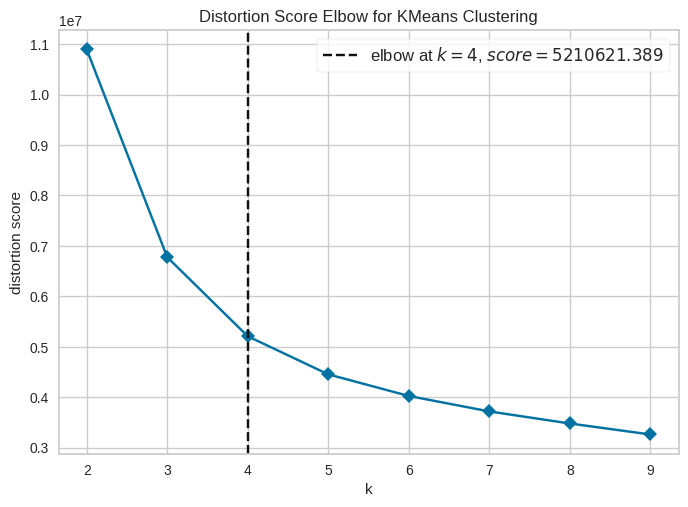

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)
visualizer.fit(numerical_data)
visualizer.show()

#visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz', timings=False)
#visualizer.fit(data_matrix)
#visualizer.show()

#visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)
#visualizer.fit(data_matrix)
#visualizer.show()

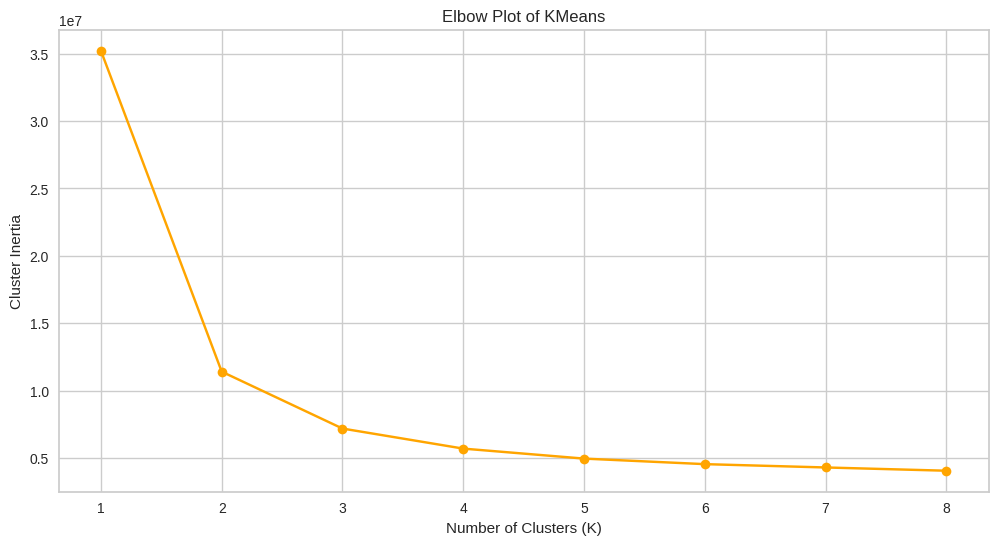

In [ ]:
def find_best_clusters(df, maximum_K):

    clusters_centers = []
    k_values = []

    for k in range(1, maximum_K):

        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)

        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)


    return clusters_centers, k_values

def generate_elbow_plot(clusters_centers, k_values):

    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

#clusters_centers, k_values = find_best_clusters(data_matrix, 9)

generate_elbow_plot(clusters_centers, k_values)

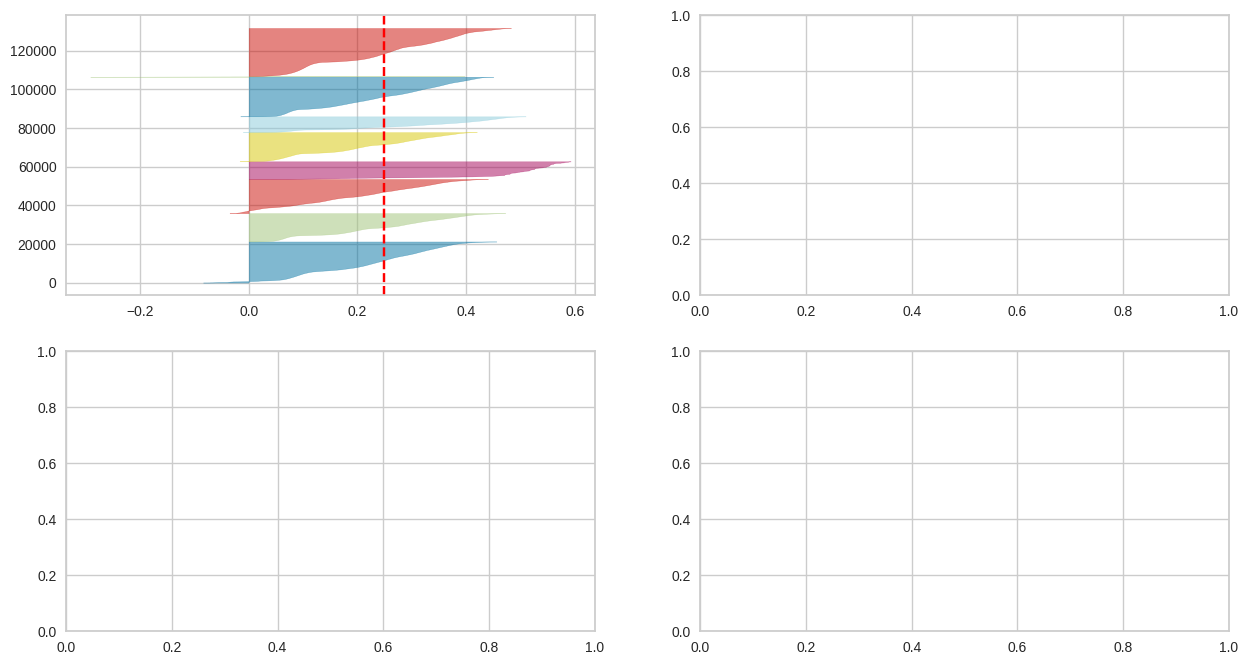

In [ ]:
#score = silhouette_score(numerical_data, kmeans_model.labels_, metric='euclidean')


fig, ax = plt.subplots(2, 4, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7, 8, 9]:

    km = KMeans(n_clusters=i)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_matrix)


# Clustering

In [ ]:
def clustering(cluster_data, dataframe_, num_clusters, scores, cluster_distribution, pca, diagram):

  dataframe = dataframe_

  #klastering podataka
  kmeans_model = KMeans(n_clusters = num_clusters)
  kmeans_model.fit(cluster_data)

  print(cluster_data.shape)

  #dodjeljivanje klaster labela u dataframe
  dataframe["clusters"] = kmeans_model.labels_
  dataframe.head()

  #prikaz grafika distribucije klastera
  if cluster_distribution == True:
    pie = dataframe.groupby('clusters').size().reset_index()
    pie.columns = ['clusters','value']
    fig = px.pie(pie, values='value', names='clusters', color=['blue','red','green', 'yellow'])
    fig.show()

    cluster_counts = dataframe['clusters'].value_counts()
    print("Cluster distribution: ", cluster_counts)

  #prikaz grafika pca
  if pca == True:
    visualizer = InterclusterDistance(kmeans_model)
    visualizer.fit(cluster_data)
    visualizer.show()

  #prikaz dijagrama srednjih vrijednosti karakteristika za svaki klaster
  if diagram == True:
    dataframe = dataframe.drop('num_words', axis=1)
    polar = dataframe.groupby("clusters").mean().reset_index()
    polar = pd.melt(polar, id_vars=["clusters"])
    fig1 = px.line_polar(polar, r="value", theta="variable", color="clusters", line_close=True, height=800, width=1400)
    fig1.show()

  if scores == True:
    silhouette_avg = silhouette_score(cluster_data, kmeans_model.labels_)
    print("Silhouette score: ", silhouette_avg)

    ch_score = calinski_harabasz_score(cluster_data, kmeans_model.labels_)
    print("Calinski Harbasz score: ",  ch_score)

    db_score = davies_bouldin_score(cluster_data, kmeans_model.labels_)
    print("Davies Bouldin score: ",  db_score)

In [ ]:
#svi podaci, count vectorizer za emojije
clustering(data_matrix, data, 4, False, True, True, True)

In [ ]:
#samo numericki podaci, bez emojija
clustering(numerical_data, data, 4, False, True, True, True)

In [ ]:
#samo emojiji
clustering(X.toarray(), data, 4, True, True, True, True)

In [ ]:
#izbacene 4 slicne numericke kolone: day of week, num of emoticons, capital letters, avg word len
clustering(data_matrix, data, 4, False, True, True, True)

In [ ]:
#iste uklonjene kolone kao i prije, spojeni uzvicnici i upitnici u jednu
clustering(data_matrix, data, 4, True, True, True, True)

In [ ]:
#isto kao i prethodno ali normalizirano
clustering(data_matrix, data, 4, True, True, True, True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



(131699, 1739)


Cluster distribution:  2    44895
0    38307
3    27422
1    21075
Name: clusters, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



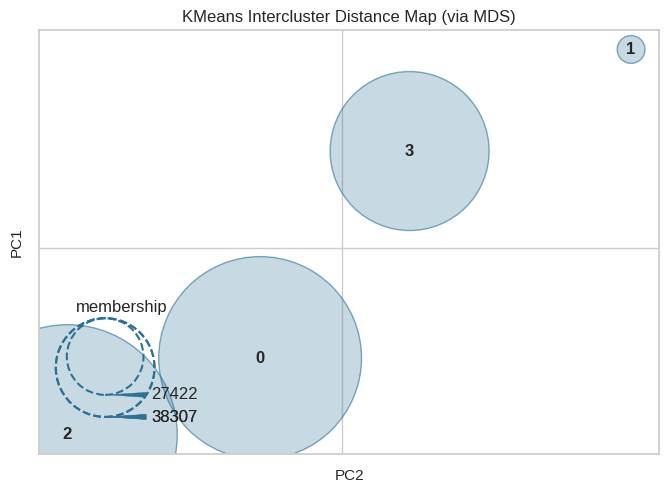

<ipython-input-52-6f406e85bbbe>:34: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is d

In [ ]:
#bez normalizacije, sa uklonjenim kolonama, distinct emojis umjesto svih
clustering(data_matrix, data, 4, False, True, True, True)

In [ ]:
#bez normalizacije, sa uklonjenim kolonama, distinct emojis umjesto svih, tfidf umjesto bag of words
clustering(data_matrix, data, 4, True, True, True, True)

In [ ]:
data_new = data.copy()

In [ ]:
data = data.drop('clusters', axis=1)

In [ ]:
data = data_new.copy()

In [ ]:
data_new.head()

,distinct_emojis,emoji_count,distinct_emoji_count,hashtags,url_count,num_words,dots,commas,exclamation_marks,question_marks
0,broken_heart,1,1,0,1,12.0,2,0,1,0
1,loudly_crying_face,2,1,0,0,33.0,1,0,0,0
2,black_flag \U000e0067\U000e0062\U000e0077\U00...,1,1,4,2,30.0,3,2,0,0
3,rolling_on_the_floor_laughing,7,1,0,1,0.0,1,0,0,0
4,pleading_face,1,1,0,0,24.0,0,0,0,0


In [ ]:
##bez normalizacije, sa uklonjenim kolonama, distinct emojis umjesto svih, tfidf umjesto bag of words
#drugi klastering algoritam algorithm='elkan'
clustering(data_matrix, data, 4, True, True, True, True)

In [ ]:
##bez normalizacije, sa uklonjenim kolonama, distinct emojis umjesto svih, tfidf umjesto bag of words
#default klastering algoritam ali povecan broj iteracija
clustering(data_matrix, data, 4, True, True, True, True)

In [ ]:
def emojize_aliases(s):
    words = s.split()
    for i in range(len(words)):
        if '_' in words[i]:
            words[i] = emoji.emojize(':' + words[i] + ':')
    return ' '.join(words)

# apply the emojize_aliases function to the 'text' column
data['all_emojis'] = data['all_emojis'].apply(emojize_aliases)

# Cluster analysis

In [ ]:
def convert_emojis_back(text):
    return emoji.emojize(text, delimiters=(' ', ' '))

data['distinct_emojis'] = data['distinct_emojis'].apply(convert_emojis_back)

In [ ]:
data.head()

,distinct_emojis,emoji_count,distinct_emoji_count,hashtags,url_count,num_words,dots,commas,exclamation_marks,question_marks,clusters1
0,💔,1,1,0,1,12.0,2,0,1,0,3
1,😭,2,1,0,0,33.0,1,0,0,0,2
2,🏴\U000e0067\U000e0062\U000e0077\U000e006c\U000...,1,1,4,2,30.0,3,2,0,0,2
3,🤣,7,1,0,1,0.0,1,0,0,0,0
4,🥺,1,1,0,0,24.0,0,0,0,0,2


In [ ]:
cluster_counts = data.groupby('clusters1')['distinct_emojis'].value_counts()
most_common_emojis = cluster_counts.groupby('clusters1').nlargest(3)
most_common_emojis

clusters1  clusters1  distinct_emojis
0          0          😂                  2908
                      😭                  2059
                      🤣                  1746
1          1          😂                   873
                      🤔                   677
                      🙄                   602
2          2          😂                  1137
                      🤔                   686
                      🤣                   666
3          3          😂                  2279
                      😭                  1722
                      🤣                  1357
Name: distinct_emojis, dtype: int64

In [ ]:
data1 = data.drop('num_words', axis=1)
polar=data1.groupby("clusters1").mean().reset_index()
polar=pd.melt(polar,id_vars=["clusters1"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="clusters1", line_close=True,height=800,width=1400)
fig4.show()

<ipython-input-20-37998168aa5b>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is de

In [ ]:
groups = data.groupby('clusters1')
for data2 in groups:
  print(data2)


AttributeError: ignored

# New Kmeans

In [ ]:
!git clone https://github.com/YousefGh/kmeans-feature-importance.git
! mv "./kmeans-feature-importance/kmeans_interp/" "."
! pip install -r "kmeans-feature-importance/requirements.txt"

Cloning into 'kmeans-feature-importance'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 108 (delta 40), reused 86 (delta 21), pack-reused 0
Receiving objects: 100% (108/108), 2.83 MiB | 13.97 MiB/s, done.
Resolving deltas: 100% (40/40), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 61.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn: filename=scikit_learn-0.24.2-cp310-cp310-linux_x86_64.whl size=24897934 sha256=3a4b6854ec71697a2a14dfb1cd7d0ad9570ca60e5cf034051be41fef5a60525e
  Stored in directory: /root/.cache/pip/wheels/13/a4/68/4e78865652fa14db4a162b491e5138565f97646f9e1f2ab8cc
Successfully built scikit-learn
  Attempting uninsta

In [ ]:
data.columns.tolist()

['emoji_list',
 'emoji_count',
 'distinct_emoji_count',
 'hashtags',
 'url_count',
 'dots',
 'commas',
 'exclamation_marks',
 'question_marks',
 'clusters']

In [ ]:
df1 = data
df1.columns.tolist()
df1 = df1.drop('emoji_list', axis=1)

In [ ]:
from kmeans_interp.kmeans_feature_imp import KMeansInterp

kms = KMeansInterp(
    n_clusters=4, # Set the number of clusters to the number of actual unique categories
    random_state=1,
    ordered_feature_names=df1.columns.tolist(),
    feature_importance_method='wcss_min', # Or 'unsup2sup'
).fit(df1)

# Create a new column to the dataset which will have cluster labels
labels = kms.labels_
df1['Cluster'] = labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
#kmeans_model.feature_importances_[1][:10]

In [ ]:
kms.feature_importances_[0][:10]

[('num_words', 30.195912816292275),
 ('avg_word_len', 4.965113782335832),
 ('day_of_week', 3.811352492752581),
 ('emoji_count', 2.2288035503382537),
 ('dots', 2.1735084642640583),
 ('clusters', 1.9999999999999583),
 ('distinct_emoji_count', 1.5940016463261812),
 ('hashtags', 0.9908378368704381),
 ('commas', 0.9761282702838308),
 ('url_count', 0.3705665509466493)]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeansInterp was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



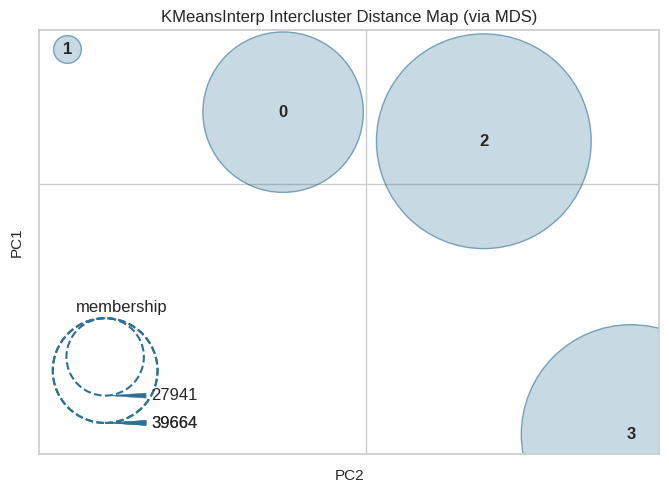

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:

visualizer = InterclusterDistance(kms)
visualizer.fit(df1)
visualizer.show()


polar=df1.groupby("clusters").mean().reset_index()
polar=pd.melt(polar,id_vars=["clusters"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="clusters", line_close=True,height=800,width=1400)
fig4.show()

# Gap statistic

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gap_statistic import OptimalK
try:
    from sklearn.datasets.samples_generator import make_blobs
except ImportError:
    from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [ ]:
optimalK = OptimalK(parallel_backend='rust')
optimalK

OptimalK(n_jobs=2, parallel_backend="rust")

In [ ]:
n_clusters = optimalK(data_matrix, cluster_array=np.arange(1, 15))
print('Optimal clusters: ', n_clusters)

ModuleNotFoundError: ignored

# Hopkins metric

In [ ]:
def hopkins_statistic(X):

    X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0]*0.05) #0.05 (5%) based on paper by Lawson and Jures


    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))



    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]


    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]



    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H